<a href="https://colab.research.google.com/github/Leo270499/Apuntes/blob/main/Desafio_AlgoritmoML_MVP_Leonardo_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHURN:** Desentrañando el Desempleo Voluntario - *Un Análisis de las Tasas de Desempleo y el Abandono Laboral*

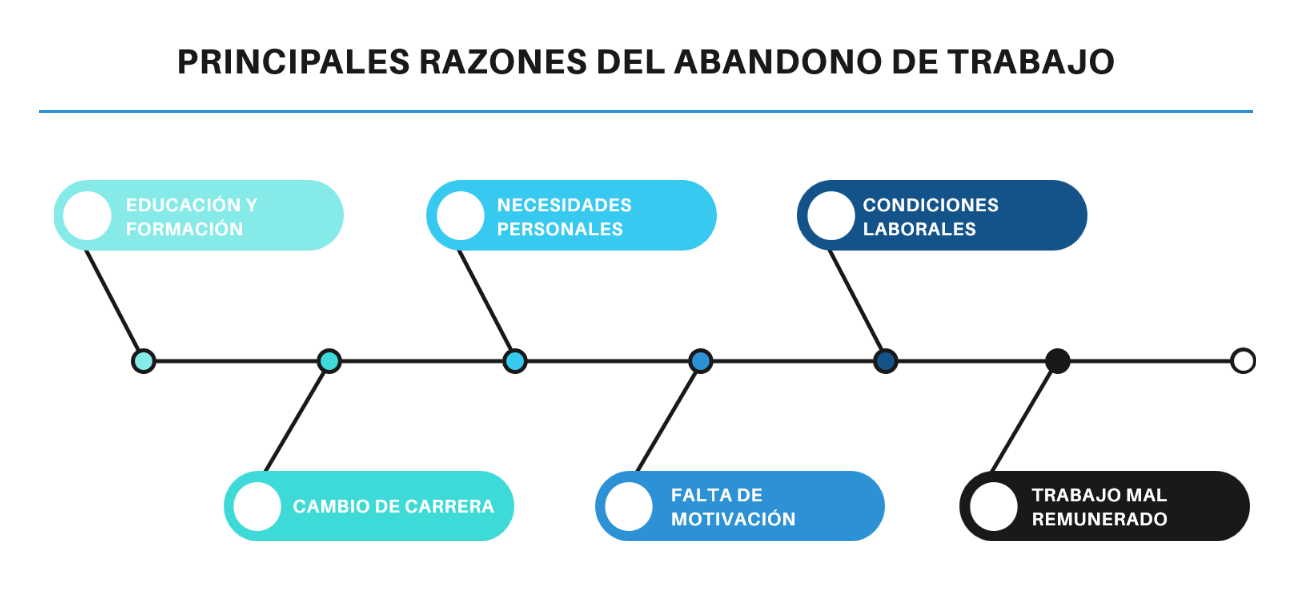

## **1. Introduction**

### **1.1. Abstract**
En la era actual de la información y la tecnología, las empresas se encuentran inmersas en un entorno empresarial cada vez más competitivo. La retención de talento y la gestión eficaz de los recursos humanos se han convertido en factores críticos para el éxito y la sostenibilidad de cualquier organización. El abandono de empleados, o la pérdida de personal clave, puede tener un impacto devastador en la productividad y la rentabilidad de una empresa.

El objetivo de este estudio es utilizar algoritmos de machine learning con el fin de crear modelos de clasificación que me permita predecir el abandono de empleados de una empresa. A través de esto, se podrá anticipar y abordar las causas de abandono, permitiendo tomar medidas para retener personal valioso y futuros talentos.

### **1.2. Motivation and Audience**
**Motivation**

La motivación detrás de este proyecto de Data Science es abordar uno de los desafíos más urgentes que enfrentan las organizaciones en la actualidad: la retención de talento. La alta rotación de empleados y la pérdida de personal valioso pueden tener un impacto significativo en la estabilidad y el éxito de una empresa.

Este proyecto busca proporcionar a las empresas una herramienta predictiva precisa que les permita tomar medidas proactivas para reducir el abandono de empleados y, en última instancia, mejorar su eficacia y competitividad en el mercado.

**Audience**

Este trabajo está destinado a una audiencia diversa como:

1.	**Profesionales de Recursos Humanos:** Este proyecto proporcionará a los especialistas en recursos humanos una herramienta valiosa para predecir el abandono de la empresa y, en consecuencia, tomar medidas preventivas para retener a los empleados.
2.	**Gerentes y Líderes Empresariales:** Los líderes empresariales pueden beneficiarse de este trabajo al comprender mejor cómo los factores internos y externos pueden afectar la retención de empleados, lo que les permite tomar decisiones estratégicas informadas.
3.	**Data Scientists y Analistas:** Aquellos interesados en el campo de Data Science y Machine Learning encontrarán este proyecto como un ejemplo práctico de cómo aplicar estas técnicas en un contexto empresarial y de recursos humanos.
4.	**Empresas y Organizaciones:** Cualquier entidad interesada en mejorar su retención de empleados y su rendimiento general puede beneficiarse de los conocimientos y modelos desarrollados en este proyecto.

En resumen, este proyecto tiene como objetivo servir como un recurso valioso para cualquier persona o entidad interesada en abordar el desafío del abandono de la empresa desde una perspectiva basada en datos y orientada a la toma de decisiones informadas.


## **2. Hypothesis**

Para esta primera entrega, hago presente 4 hipotesis:

H1. ¿La variable que más influye en el abandono de la empresa de un trabajador es la sastifacción laboral?

H2. ¿La variable que más influye en el abandono de la empresa de un trabajador es la salario mensual?

H3. ¿La variable que más influye en el abandono de la empresa de un trabajador es el bajo salario?

H4. ¿El bajo nivel educativo influira en el abandono de trabajo?

## **3. Theoretical Framework**

### **3.1. Objetive**
El objetivo principal desde este proyecto de ciencia de datos es desarrollar un modelo de clasificación que prediga el abandono laboral de los empleados. Este modelo tiene la finalidad de ayudar a las organizaciones a identificar los factores que contribuyen al abandono y tomar medidas proactivas para retener a su personal y mejorar la retención de empleados.

### **3.2. Business Context**
En el entorno empresarial actual, la retención de empleados es un desafío crucial debido a sus costos, impacto en la productividad y la competencia por el talento. La pérdida de empleados clave puede afectar la continuidad operativa y la reputación de la empresa.

### **3.3. Commercial Issue**
El problema comercial que este proyecto busca abordar es la falta de una herramienta predictiva precisa para prever y reducir el abandono de la empresa. Las organizaciones a menudo enfrentan dificultades para identificar a tiempo a los empleados que están en riesgo de abandonar la empresa, lo que limita su capacidad para tomar medidas preventivas. Esta falta de anticipación puede resultar en costos adicionales y la pérdida de talento valioso.

### **3.4. Analytical Context**
En este proyecto de análisis de datos, se recopilarán y analizarán datos históricos relacionados con el empleo, como satisfacción laboral, rendimiento, antigüedad, compensación y otros factores. Se utilizarán técnicas de Machine Learning y análisis estadístico para crear un modelo que pueda predecir el abandono laboral basado en estos datos.

El enfoque se centra en construir un modelo preciso y descubrir los factores más influyentes en el abandono laboral. También se explorarán métodos para evaluar su efectividad y se considerarán mejoras continuas para mantener su precisión.

## **4. Environment Setup**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Librerias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [3]:
# Crear una tabla
ResumenInflación = [
    ["Inflacción Friccional", "Inflación voluntaria e Inflación involuntaria"],
    ["Inflación Ciclica", "Relacionada al ciclo económico."],
    ["Inflación  Estructural", "Escazes de recursos naturales."]]

# Tabulate los datos
table = tabulate(ResumenInflación, headers=["Tipo", "Descripción"], tablefmt="pretty")

## **5. Data Acquisition**

In [4]:
PATH1 = "/content/drive/MyDrive/Coderhouse_ Data Science/9. Data StoryTelling (Data Science)/unemployment analysis.csv"
df1 = pd.read_csv(PATH1)
PATH2 = "/content/drive/MyDrive/Coderhouse_ Data Science/6. Primera Entrega (Data Science)/Dataset/Abandono.csv"
df2 = pd.read_csv(PATH2, sep = ';', index_col= 'id', na_values='#N/D')


In [5]:
pd.set_option('display.max_columns', 31)

## **6. Data Wrangling**



In [6]:
#Seleccionamos los paises Latinoamericanos
df1_latam = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela', 'Mexico']

# Lo filtramos
df1_latam = df1[df1['Country Name'].isin(df1_latam)]

# Eliminamos las columnas innecesarias
columns_to_drop = ['Country Code']
df1_latam = df1_latam.drop(columns=columns_to_drop)

# Eliminamos filas con valores nulos
df1_latam = df1_latam.dropna()

# Establece 'Country Name'
df1_latam = df1_latam.set_index('Country Name')

In [7]:
df1_latam["2020"]

Country Name
Argentina    11.46
Bolivia       7.90
Brazil       13.69
Chile        11.18
Colombia     15.04
Ecuador       6.11
Mexico        4.45
Peru          7.18
Paraguay      7.55
Uruguay      10.35
Name: 2020, dtype: float64

## **7. Data Driven**

**Desempleo**
Es la condición en la que las personas dispuestas y capaces de trabajar no encuentran empleo remunerado. Su medición se usa como indicador económico clave. Existen 3 tipos de desempleo y serán explicados más adelante.

**Una breve vista del desempleo en latinoamerica**

Se obtuvieron los datos de los principales paises de latinoamerica, para los años 1991-2021. Podemos observar los siguientes gráficos:


1.   **Comportamiento de la tasa de desempleo, según el país.** A través de esta pequeña tabla, se puede apreciar cuál fue el peor año para los paises latinoamericanos.
2.   **Comportamiento de la tasa de desempleo peruana respecto a las demás economías.** El cuál presento bajas tasas de desempleo respecto a los demás paises.
3.   **Tasas de desempleo en el año 2020 (covid-19).** Se puede observar a través del primer gráfico que el año 2020 se elvaron las tasas de desempleo, siendo Colombia *(tercer gráfico)* el más perjudicado por el efecto de la pandemia.

In [8]:
# Encuentra el máximo en cada columna y resalta con un color
df1_latam1 = df1_latam.T
df1_latam_max = df1_latam1.style.apply(lambda x: ['background: skyblue' if v == x.max() else '' for v in x], axis=0, subset=df1_latam1.columns[:])

# Muestra el DataFrame con los máximos resaltados
print("Gráfico 1: Comportamiento de las principales economías latinoamericanas")
df1_latam_max

Gráfico 1: Comportamiento de las principales economías latinoamericanas


Country Name,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Mexico,Peru,Paraguay,Uruguay
1991,5.440000,2.960000,6.310000,5.230000,10.120000,4.370000,3.150000,4.560000,5.100000,8.950000
1992,6.360000,3.260000,6.420000,4.350000,9.440000,4.530000,3.240000,4.720000,4.980000,8.960000
1993,10.100000,3.080000,6.030000,4.490000,7.800000,4.560000,3.370000,4.500000,5.060000,8.350000
1994,11.760000,3.080000,6.170000,5.870000,8.250000,4.440000,4.440000,4.250000,4.410000,9.040000
1995,18.800000,2.750000,6.420000,4.700000,8.720000,4.590000,7.100000,4.480000,3.400000,10.020000
1996,17.110000,2.440000,7.250000,7.410000,11.810000,4.650000,5.470000,4.720000,8.150000,11.930000
1997,14.820000,2.080000,8.160000,7.140000,12.140000,4.510000,4.240000,4.590000,5.360000,11.440000
1998,12.650000,2.130000,9.420000,7.310000,15.000000,4.610000,3.730000,4.950000,4.420000,9.360000
1999,14.050000,2.440000,10.210000,11.160000,20.060000,5.180000,2.600000,4.900000,5.340000,10.470000
2000,15.000000,2.380000,9.560000,10.490000,20.520000,4.800000,2.650000,4.880000,7.610000,12.630000


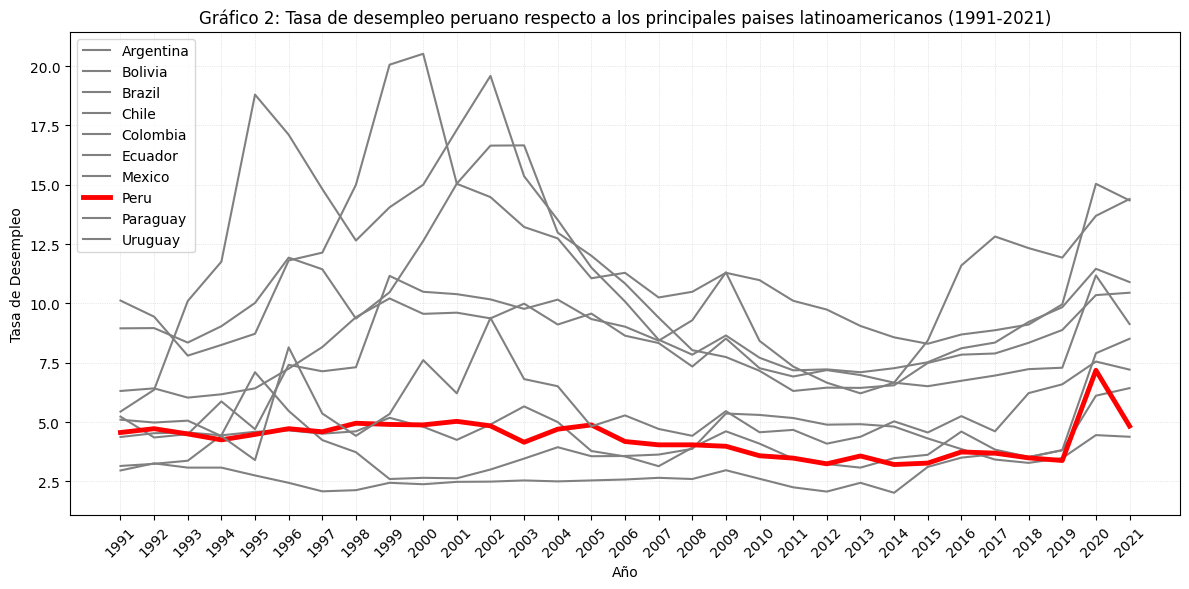

In [9]:
# Serie de Tiempo: Perú respecto a paises latinoamericanos
plt.figure(figsize=(12, 6))

for country in df1_latam1.columns:
    if country == "Peru":
        plt.plot(df1_latam1.index, df1_latam1[country], label=country, color='red', linewidth=3.5)
    else:
        plt.plot(df1_latam1.index, df1_latam1[country], label=country, color='gray')

plt.xlabel('Año')
plt.ylabel('Tasa de Desempleo')
plt.title('Gráfico 2: Tasa de desempleo peruano respecto a los principales paises latinoamericanos (1991-2021)')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='dotted', linewidth=0.5, color='lightgray')
plt.show()

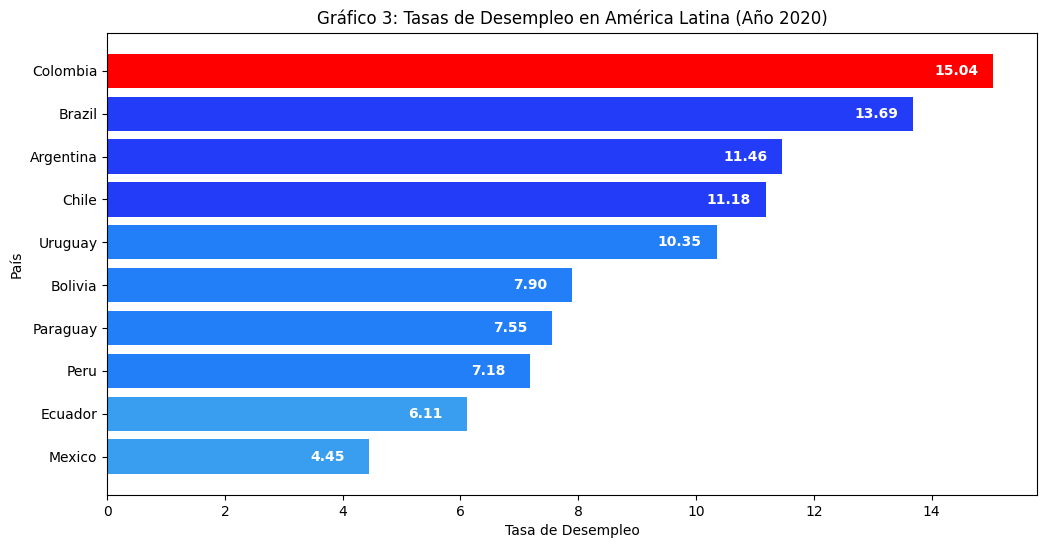

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

tasas_desempleo_2020 = df1_latam["2020"]
tasas_desempleo_2020 = tasas_desempleo_2020.sort_values(ascending=True)

colores = []
for tasa in tasas_desempleo_2020:
    if tasa > 15:
        colores.append("red")
    elif tasa >= 11 and tasa <= 15:
        colores.append('#233CF7')
    elif tasa >= 7 and tasa < 11:
        colores.append('#237FF7')
    else:
        colores.append('#3A9EF0')

plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura
bars = plt.barh(tasas_desempleo_2020.index, tasas_desempleo_2020, color=colores)

for bar, tasa in zip(bars, tasas_desempleo_2020):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height() / 2, f'{tasa:.2f}', ha='left', va='center', color='white', fontweight='bold')

plt.title('Gráfico 3: Tasas de Desempleo en América Latina (Año 2020)')
plt.xlabel('Tasa de Desempleo')
plt.ylabel('País')
plt.show()


***RESUMEN***

**Gráfico 1:** Las economías latinoamericanas en sus peores años pueden llegar
a tener tasas de desempleo mayores a 2 digitos.

**Gráfico 2:** La economía peruana presento bajas tasas de desempleo en general.

**Gráfico 3:** El país que presento la mayor tasa de desempleo por efectos de la pandemia fue Colombia.

**Decisión (Importante)**

El estudio del desempleo es crucial para medir la salud económica y diseñar políticas que aborden la falta de empleo, promoviendo la prosperidad de la población. Proporciona información esencial para la toma de decisiones.

Por lo tanto, se buscará explicar el desempleo voluntario y sus efectos en la economía a través del dataset que se desarrollará en esta oportunidad.

In [11]:
print(table)

+------------------------+-----------------------------------------------+
|          Tipo          |                  Descripción                  |
+------------------------+-----------------------------------------------+
| Inflacción Friccional  | Inflación voluntaria e Inflación involuntaria |
|   Inflación Ciclica    |        Relacionada al ciclo económico.        |
| Inflación  Estructural |        Escazes de recursos naturales.         |
+------------------------+-----------------------------------------------+


En el EDA se trabaja en df2 -> desempleo voluntario (abandono de trabajo)

## **8. EDA**

### **8.1. Descriptive Analysis**

In [12]:
df2.sample(3)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,mayor_edad,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
355,31,Yes,Travel_Frequently,Research & Development,29,Secundaria,Medical,1,Alta,2.0,Media,1,Laboratory Technician,Media,Single,3479,0,Y,No,11,Alta,Media,80,0,6,2,NaN,5,NaN,1,4
233,27,No,Travel_Rarely,Research & Development,17,Universitaria,Technical Degree,1,Alta,3.0,Alta,1,Research Scientist,Alta,Married,3058,0,Y,Yes,16,Alta,Muy_Alta,80,1,6,3,NaN,5,NaN,1,1
2065,49,No,Travel_Frequently,Sales,2,Secundaria,Medical,1,Muy_Alta,NaN,Media,2,Sales Executive,Media,Married,5390,2,Y,No,14,Alta,Muy_Alta,80,0,17,3,NaN,9,NaN,0,8


In [13]:
 df2.shape

(1470, 31)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

In [15]:
df2.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [16]:
# Valores nulos EN PORCENTAJE
porcentaje_nulos = df2.isnull().mean() * 100
porcentaje_nulos = porcentaje_nulos.round(2)  # Redondear a 2 cifras decimales
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)

print(porcentaje_nulos)

anos_en_puesto              84.22
conciliacion                68.78
sexo                        13.54
educacion                    6.87
satisfaccion_trabajo         5.17
implicacion                  1.22
edad                         0.00
nivel_acciones               0.00
evaluacion                   0.00
satisfaccion_companeros      0.00
horas_quincena               0.00
anos_experiencia             0.00
horas_extra                  0.00
num_formaciones_ult_ano      0.00
anos_compania                0.00
anos_desde_ult_promocion     0.00
incremento_salario_porc      0.00
salario_mes                  0.00
mayor_edad                   0.00
num_empresas_anteriores      0.00
abandono                     0.00
estado_civil                 0.00
puesto                       0.00
nivel_laboral                0.00
satisfaccion_entorno         0.00
empleados                    0.00
carrera                      0.00
distancia_casa               0.00
departamento                 0.00
viajes        

**Decisiones tomadas después de la revisión de Nulos**

* Las variables con más del 50% nulos, serán elimanadas en este caso anos_en_puesto y conciliacion.

* Las variables con poco nulos, debemos analizar en el EDA, para ver como lo imputamos.

In [17]:
df2.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)

### **8.2. Categorical Variables**

In [18]:
df2_cat = df2.select_dtypes(include='object')

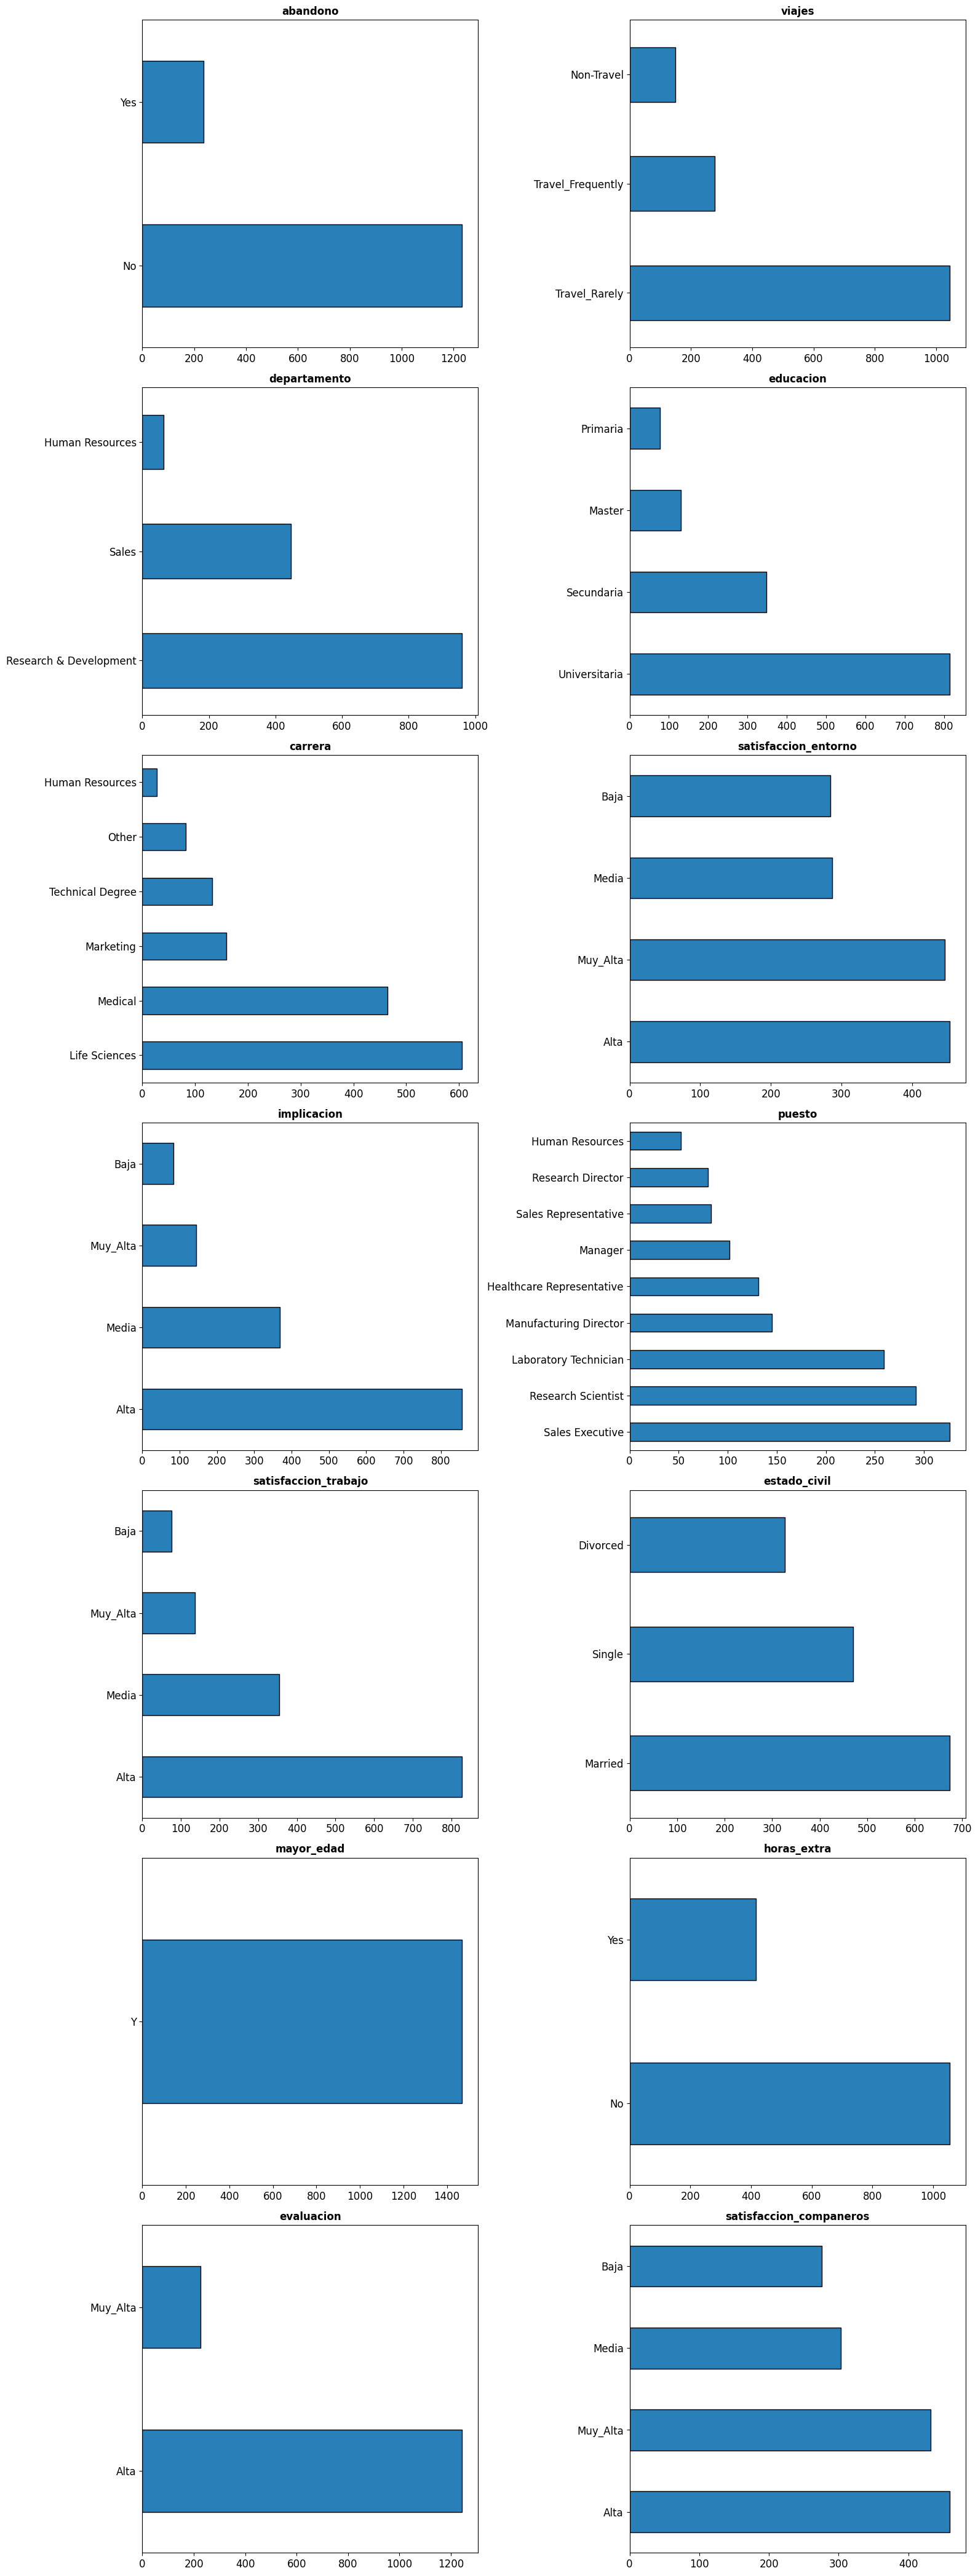

In [19]:
num_vars = len(df2_cat.columns)
num_rows = math.ceil(num_vars / 2)

fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))

for i, variable in enumerate(df2_cat.columns):
    row = i // 2
    col = i % 2

    df2_cat[variable].value_counts().plot.barh(ax=axs.reshape(-1)[i], color="#2980b9", edgecolor='black', linewidth=1)

    axs.reshape(-1)[i].set_title(variable, fontsize=12, fontweight="bold")
    axs.reshape(-1)[i].tick_params(labelsize=12)

if num_vars % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()

**Decisiones tomadas después, del EDA Categoricas:**

* Podemos apreciar que la variable `mayor_edad` solo tiene un valor, lo cuál no se pude categorizar, lo más conveniente es elimanarla. Pues, no me representa información.

* Sobre las imputaciones, ya se puede tener más claro, hacia donde se pueden imputar estas 3 variables:
`educacion:` imputaremos por 'Universitaria' por ser el valor que tiene más en demasia, `satisfaccion_trabajo:` imputamos por 'Alta', `implicacion:` imputamos por 'Alta'


In [20]:
# Eliminamos
df2.drop(columns = 'mayor_edad', inplace = True)
# Imputamos
df2['educacion'] = df2['educacion'].fillna('Universitaria')
df2['satisfaccion_trabajo'] = df2['satisfaccion_trabajo'].fillna('Alta')
df2['implicacion'] = df2['implicacion'].fillna('Alta')

### **8.3. Numeric Variables**

In [21]:
def estadisticos_cont(num):
    estadisticos = num.describe().T
    estadisticos['median'] = num.median()
    estadisticos = estadisticos.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]

    for col in estadisticos.columns:
        if col != "count" and estadisticos[col].dtype == 'float64':
            estadisticos[col] = estadisticos[col].apply(lambda x: "{:,.2f}".format(x))

    estadisticos["count"] = estadisticos["count"].apply(lambda x: "{:,.0f}".format(x))

    return estadisticos

In [22]:
resultados = estadisticos_cont(df2.select_dtypes('number'))
resultados

,count,mean,median,std,min,25%,50%,75%,max
edad,"1,470",36.92,36.00,9.14,18.00,30.00,36.00,43.00,60.00
distancia_casa,"1,470",9.19,7.00,8.11,1.00,2.00,7.00,14.00,29.00
empleados,"1,470",1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
sexo,"1,271",2.73,3.00,0.72,1.00,2.00,3.00,3.00,4.00
nivel_laboral,"1,470",2.06,2.00,1.11,1.00,1.00,2.00,3.00,5.00
salario_mes,"1,470","6,502.93","4,919.00","4,707.96","1,009.00","2,911.00","4,919.00","8,379.00","19,999.00"
num_empresas_anteriores,"1,470",2.69,2.00,2.50,0.00,1.00,2.00,4.00,9.00
incremento_salario_porc,"1,470",15.21,14.00,3.66,11.00,12.00,14.00,18.00,25.00
horas_quincena,"1,470",80.00,80.00,0.00,80.00,80.00,80.00,80.00,80.00
nivel_acciones,"1,470",0.79,1.00,0.85,0.00,0.00,1.00,1.00,3.00


**Decisiones tomadas después del EDA Númericas**

* Podemos apreciar que las variables `Empleados` y `Horas_quincena` solo cuentan con un valor, por lo cuál al igual que 'mayor_edad', no me generan información, lo cuál serán eliminadas.

* La variable `Sexo`, presenta 4 valores, y esta representado por números categorizados del 1 al 4, lo cuál no me permitiría explicarla, entonces será eliminada.

In [23]:
df2.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)

### **8.4. Data Visualization**

In [24]:
df2.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'satisfaccion_entorno', 'implicacion',
       'nivel_laboral', 'puesto', 'satisfaccion_trabajo', 'estado_civil',
       'salario_mes', 'num_empresas_anteriores', 'horas_extra',
       'incremento_salario_porc', 'evaluacion', 'satisfaccion_companeros',
       'nivel_acciones', 'anos_experiencia', 'num_formaciones_ult_ano',
       'anos_compania', 'anos_desde_ult_promocion', 'anos_con_manager_actual'],
      dtype='object')

**1. Gráfico:** Histogram

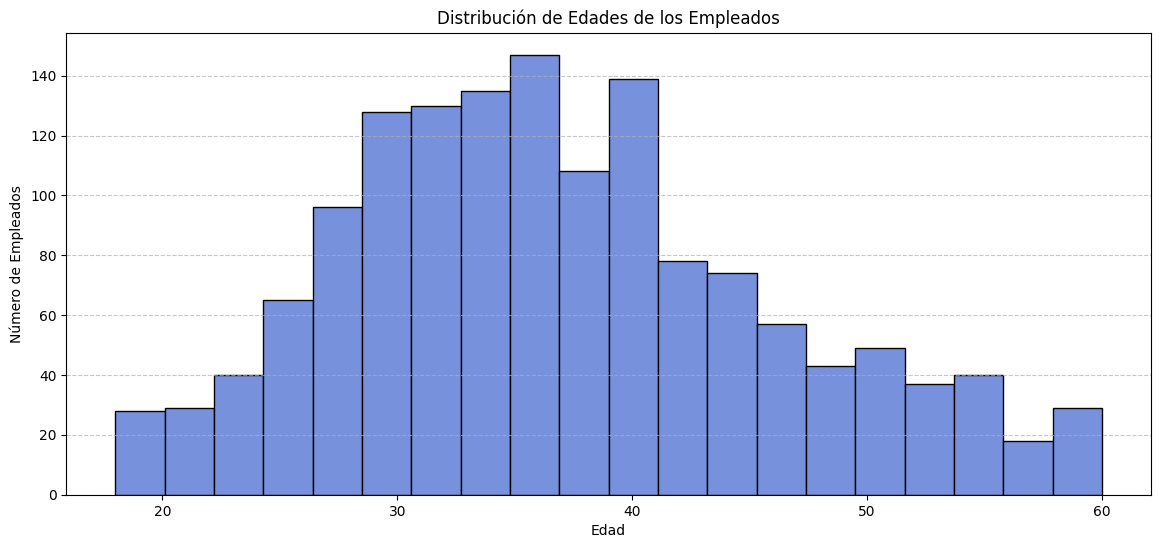

In [25]:
# Histograma
plt.figure(figsize=(14, 6))
plt.hist(df2.edad, bins=20, color='#7891DD', edgecolor='black')

plt.title('Distribución de Edades de los Empleados')
plt.xlabel('Edad')
plt.ylabel('Número de Empleados')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
filtro_edades = (df2.edad >= 30) & (df2.edad <= 40)
datos_en_rango = df2[filtro_edades].shape[0]
datos_fuera_de_rango = df2[~filtro_edades].shape[0]

print(f'Datos en el rango de 30 a 40 años: {datos_en_rango}')
print(f'Datos fuera del rango de 30 a 40 años: {datos_fuera_de_rango}')

Datos en el rango de 30 a 40 años: 679
Datos fuera del rango de 30 a 40 años: 791


**Descripción:**

*   Las edades van entre 18 y 60 años, concentrandose la mayor cantidad de empleados entre los 30 y 40 años. La cantidad de empleados que se encuentran en este rango es de 679, mientras el resto son 791.
*   Estudiar la edad es muy importante, porque nos permite saber su relación con el salario, experiencia y sastifacción laboral.




**2. Gráfico:** Countplot

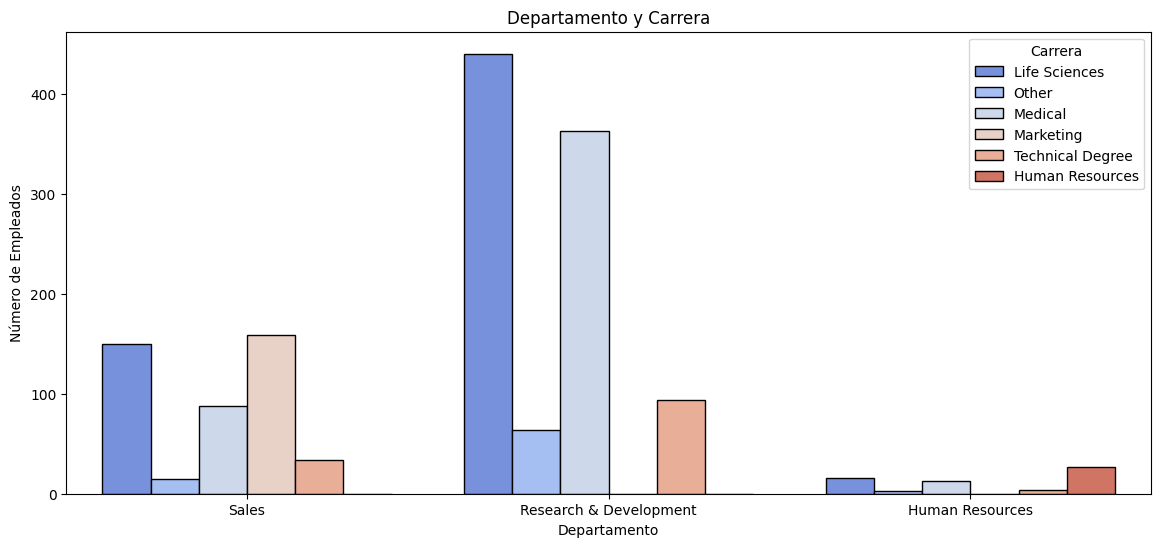

In [27]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df2, x='departamento', hue='carrera', palette='coolwarm', edgecolor='black')


plt.title('Departamento y Carrera')
plt.xlabel('Departamento')
plt.ylabel('Número de Empleados')
plt.legend(title='Carrera', loc='upper right')
plt.show()

**Descripción:**

*   Tenemos 3 departamentos de los cuales, se presentan 6 carreras.
*   El departamento de Sales tienen mayor cantidad de empleados en Life Science y Marketing, el departamento de Research & Development tiene más empleados en Life Science y Medical, mientras el area de recursos humanos presenta como es de esperarse más Huaman Resources.

Por lo cuál se podría que nuestros datos estan bien comportados, pues siempre es bueno saber de la fiabilidad de la data.

**3. Variable:** Contingency_table

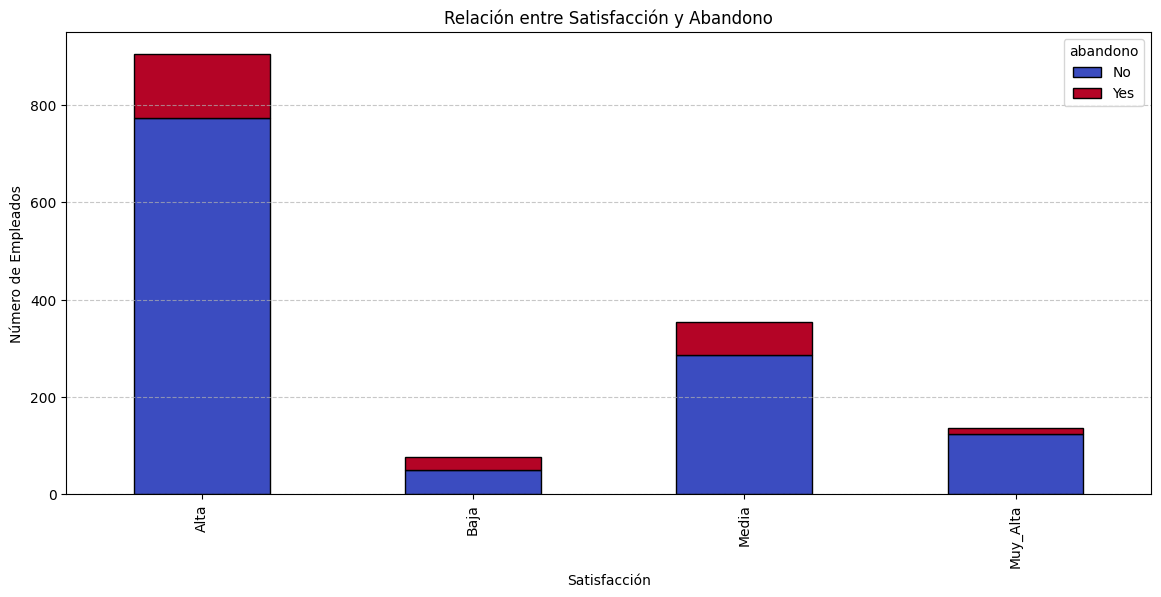

In [28]:
# Gráfico de contingencia
contingency_table = pd.crosstab(df2['satisfaccion_trabajo'], df2['abandono'])
contingency_table.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 6), edgecolor='black')

plt.title('Relación entre Satisfacción y Abandono')
plt.xlabel('Satisfacción')
plt.ylabel('Número de Empleados')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción:**

*   Se obtiene resultados muy interesantes, pues la mayor parte de los empleados consideran que tienen una Alta sastifacción.
*   Se debe tener en cuenta que a pesar que el empleado se encuentre sastifecho (Muy Alta, Alta) o no (Baja, Media), existe un pequeño grupo de empleados que terminan abandonando el trabajo.

**4. Gráfico:** Boxplot

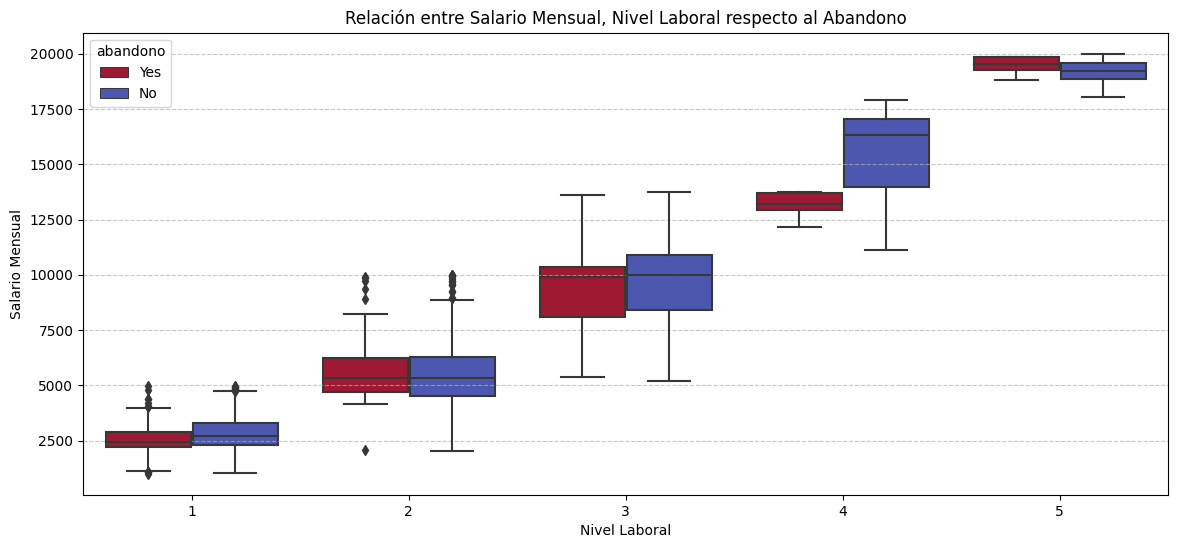

In [29]:
# Gráfico boxplot
plt.figure(figsize=(14, 6))
colores_personalizados = {'Yes': "#B40426", 'No': '#3B4CC0'}
sns.boxplot(x='nivel_laboral', y='salario_mes', hue='abandono', data=df2,palette=colores_personalizados)

plt.title('Relación entre Salario Mensual, Nivel Laboral respecto al Abandono')
plt.xlabel('Nivel Laboral')
plt.ylabel('Salario Mensual')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción:**

*   Podemos observar una relación positiva entre el nivel laboral y salario mensual.
*   El salario mensual de los empleados que abandonan es muy parecido al de los que no abandonan el trabajo, a excepeción del nivel laboral 4, que por alguna razón existe una gran brecha entre los salarios.
*   Esta gran brecha puede ser determinante para el abandono de empleo.

**5. Gráfico:** Boxplot

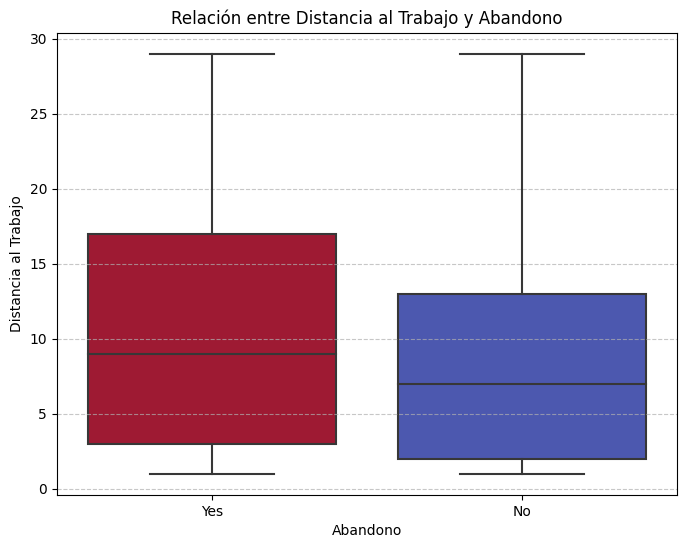

In [30]:
plt.figure(figsize=(8, 6))
colores_personalizados = {'Yes': "#B40426", 'No': '#3B4CC0'}
sns.boxplot(x='abandono', y='distancia_casa', data=df2, palette=colores_personalizados)

plt.title('Relación entre Distancia al Trabajo y Abandono')
plt.xlabel('Abandono')
plt.ylabel('Distancia al Trabajo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Descripción:**

*   Mientras mayor sea la distancia a casa los empleados decidiran abandonar el trabajo, esto puede explicarse quizas por problema de puntualidad, comodidad, etc.

### **8.5. StoryTelling**

A través de estos gráficos, buscamos entender las razones detrás de la decisión de los empleados de dejar sus puestos. Estos datos son fundamentales para mejorar la retención de talento y el ambiente laboral.

El siguiente paso, es generar Insights, para lograr explicar con certeza esta información y proceder con los modelos de machine learning.

## **9. Insights**

### **9.1. Insight 1**
**Cuantificación del problema: ¿Cual es la tasa de abandono?**

In [31]:
df2.abandono.value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

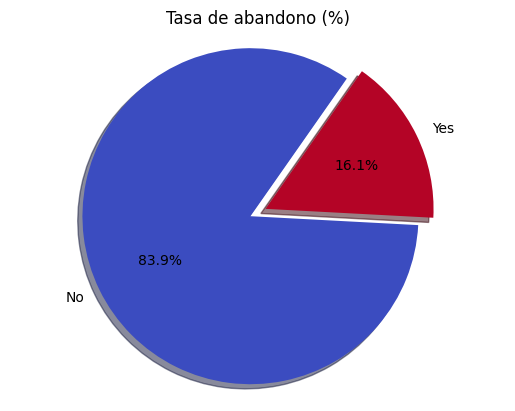

In [32]:
#Tasa de abandono
labels = ['No', 'Yes']
sizes = [83.877551, 16.122449]

colors = ['#3B4CC0', '#B40426']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=55)
plt.title('Tasa de abandono (%)')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

### **9.2. Insight 2**
**¿Hay un perfil tipo de empleado que deja la empresa?**

In [33]:
df2['abandono'] = df2.abandono.map({'No':0, 'Yes':1})

In [34]:
# Analisis por educación
temp1 = df2.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
print(temp1)

educacion
Primaria         32.467532
Secundaria       19.540230
Universitaria    14.535519
Master            8.461538
Name: abandono, dtype: float64


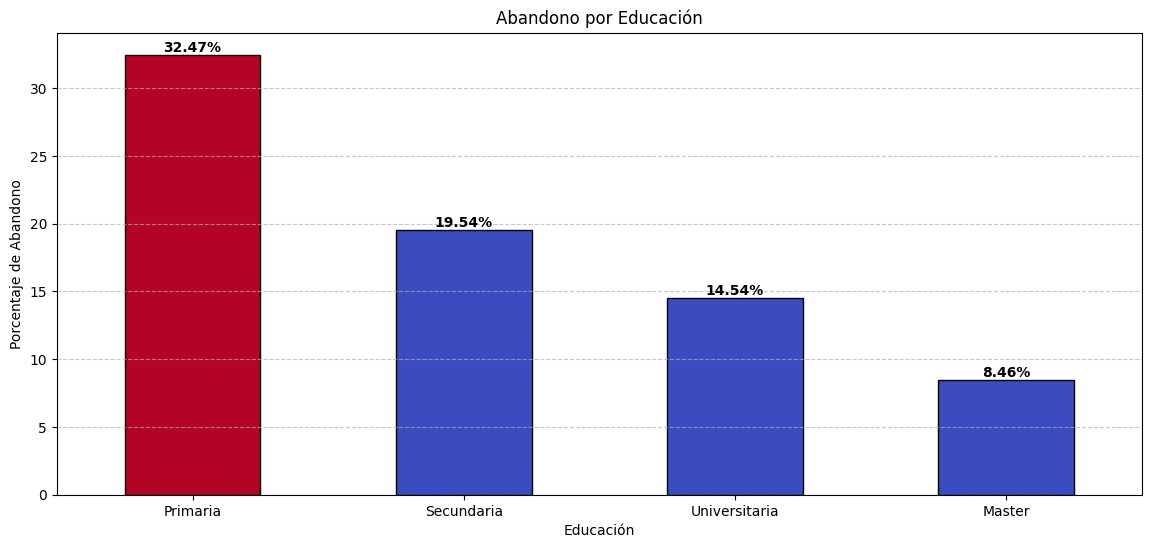

In [35]:
# Suponiendo que 'temp1' es una serie de pandas con los datos calculados
colors = ['#B40426' if x == temp1.idxmax() else '#3B4CC0' for x in temp1.index]
temp1.plot(kind='bar', figsize=(14, 6), color=colors, edgecolor='black')
# Agregar etiquetas de porcentaje dentro de las barras
for x, y in enumerate(temp1):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.title('Abandono por Educación')
plt.xlabel('Educación')
plt.ylabel('Porcentaje de Abandono')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
# Analisis por estado civil
temp2 = df2.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
print(temp2)

estado_civil
Single      25.531915
Married     12.481426
Divorced    10.091743
Name: abandono, dtype: float64


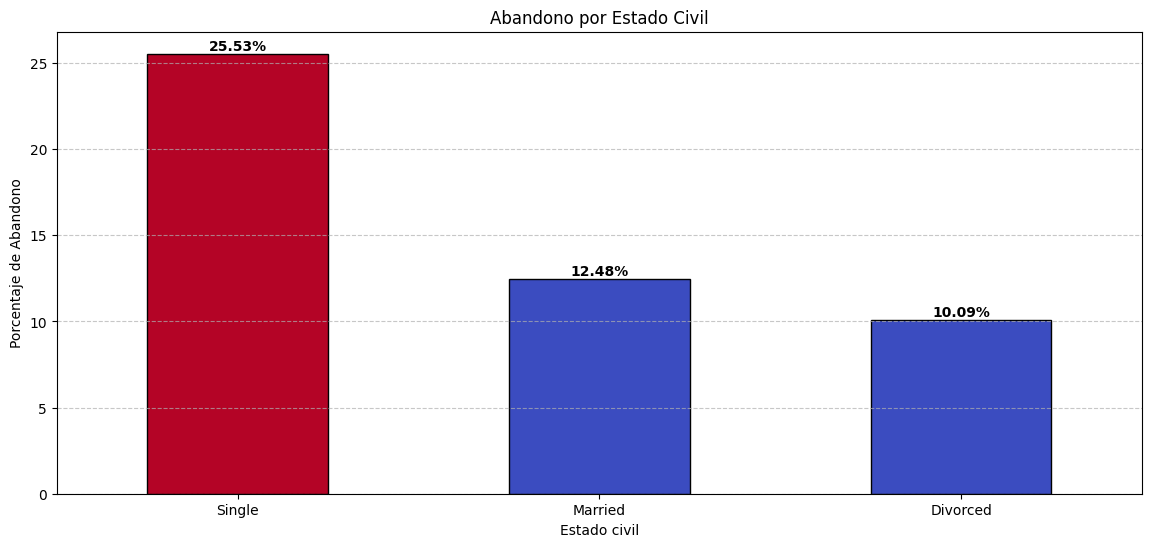

In [37]:
# Suponiendo que 'temp2 es una serie de pandas con los datos calculados
colors = ['#B40426' if x == temp2.idxmax() else '#3B4CC0' for x in temp2.index]
temp2.plot(kind='bar', figsize=(14, 6), color=colors, edgecolor='black')
# Agregar etiquetas de porcentaje dentro de las barras
for x, y in enumerate(temp2):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.title('Abandono por Estado Civil')
plt.xlabel('Estado civil')
plt.ylabel('Porcentaje de Abandono')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
# Analisis por horas extras
temp3 = df2.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
print(temp3)

horas_extra
Yes    30.528846
No     10.436433
Name: abandono, dtype: float64


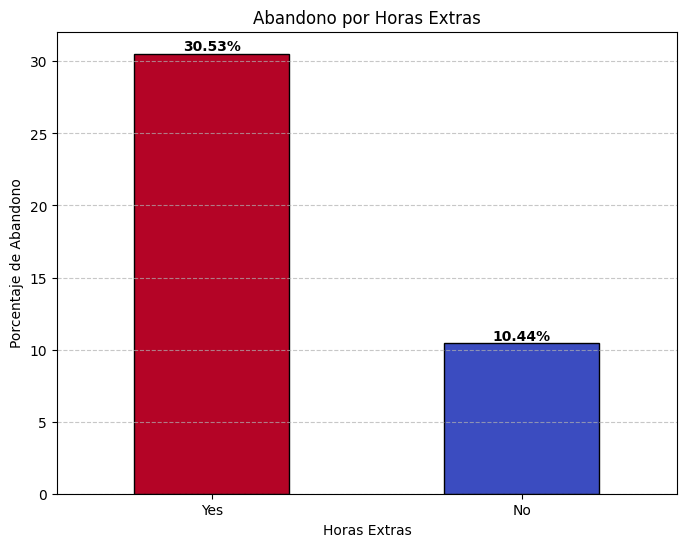

In [39]:
# Suponiendo que 'temp3' es una serie de pandas con los datos calculados
colors = ['#B40426' if x == temp3.idxmax() else '#3B4CC0' for x in temp3.index]
temp3.plot(kind='bar', figsize=(8, 6), color=colors, edgecolor='black')
# Agregar etiquetas de porcentaje dentro de las barras
for x, y in enumerate(temp3):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.title('Abandono por Horas Extras')
plt.xlabel('Horas Extras')
plt.ylabel('Porcentaje de Abandono')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [40]:
# Analisis por puesto
temp4 = df2.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
print(temp4)

puesto
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager                       4.901961
Research Director             2.500000
Name: abandono, dtype: float64


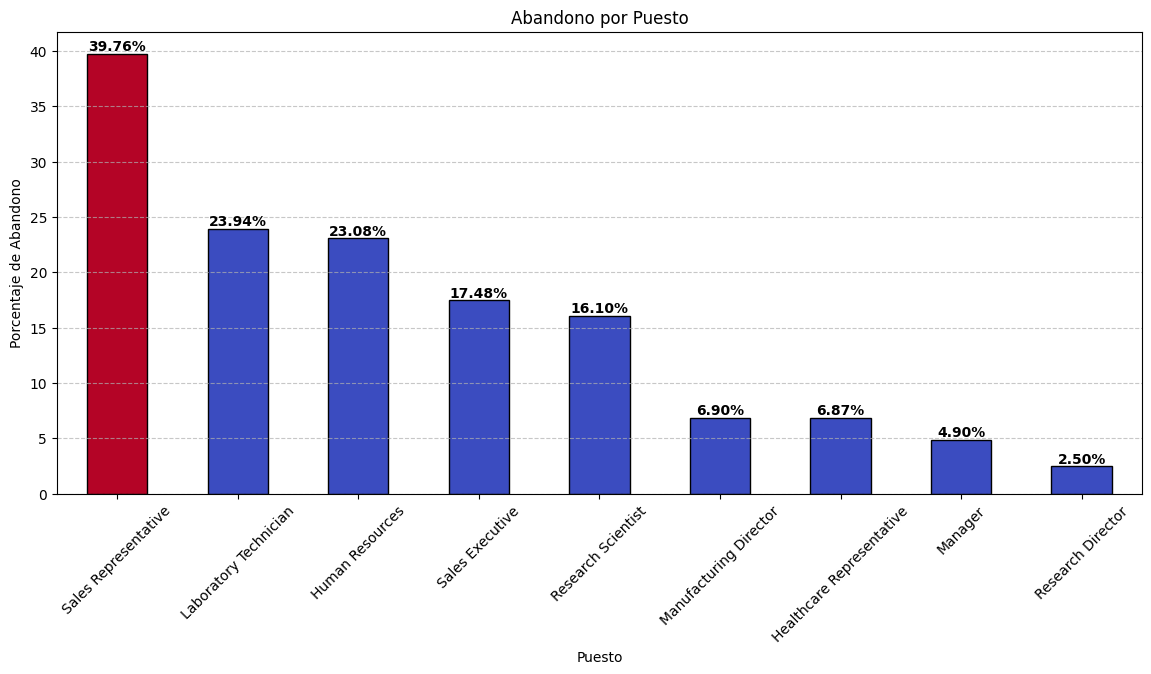

In [41]:
# Suponiendo que 'temp4' es una serie de pandas con los datos calculados
colors = ['#B40426' if x == temp4.idxmax() else '#3B4CC0' for x in temp4.index]
temp4.plot(kind='bar', figsize=(14, 6), color=colors, edgecolor='black')
# Agregar etiquetas de porcentaje dentro de las barras
for x, y in enumerate(temp4):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.title('Abandono por Puesto')
plt.xlabel('Puesto')
plt.ylabel('Porcentaje de Abandono')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
temp5 = df2.groupby('abandono').salario_mes.mean()
print(temp5)

abandono
0    6832.739659
1    4787.092827
Name: salario_mes, dtype: float64


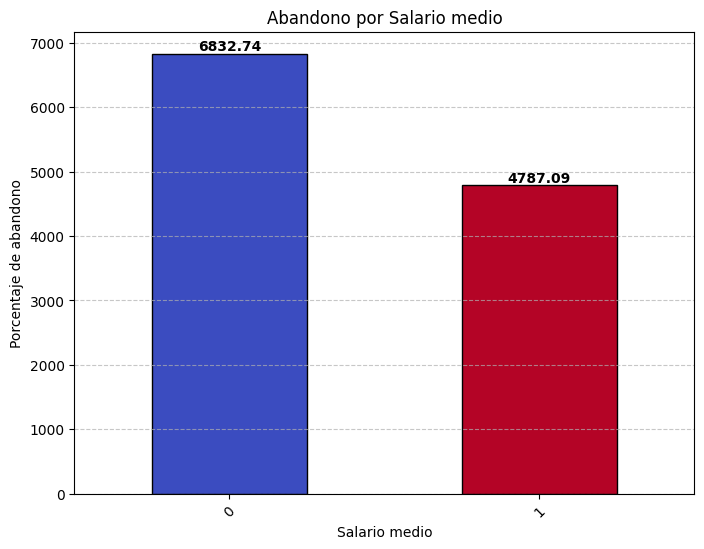

In [43]:
# Suponiendo que 'temp4' es una serie de pandas con los datos calculados
colors = ['#B40426' if x == temp5.idxmin() else '#3B4CC0' for x in temp5.index]
temp5.plot(kind='bar', figsize=(8, 6), color=colors, edgecolor='black')
# Agregar etiquetas de porcentaje dentro de las barras
for x, y in enumerate(temp5):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black', fontweight='bold')
plt.title('Abandono por Salario medio')
plt.xlabel('Salario medio')
plt.ylabel('Porcentaje de abandono')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Conclusion:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

### **9.3. Insight 3**
¿Cual es el impacto económico de este problema?
Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [44]:
# Creamos una nueva variable salario_ano del empleado
df2['salario_ano'] = df2.salario_mes.transform(lambda x: x*12)
df2[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [45]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df2['salario_ano'] <= 30000),
               (df2['salario_ano'] > 30000) & (df2['salario_ano'] <= 50000),
               (df2['salario_ano'] > 50000) & (df2['salario_ano'] <= 75000),
               (df2['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df2.salario_ano * 0.161, df2.salario_ano * 0.197, df2.salario_ano * 0.204, df2.salario_ano * 0.21]

#Aplicamos select
df2['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df2.head(3)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,Sales Executive,Alta,Single,5993,8,Yes,11,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,Research Scientist,Media,Married,5130,1,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,Laboratory Technician,Media,Single,2090,6,Yes,15,Alta,Media,0,7,3,0,0,0,25080,4037.880


### **9.4. Insight 4**
¿Cúanto le ha costado este problema en el último año a la empresa?

In [46]:
coste_total =  df2.loc[df2.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

### **9.5. Insight 5**
¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [47]:
df2.loc[(df2.abandono == 1) & (df2.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

### **9.6. Insight 6**
¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [48]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


## **10. ML**

### **10.1. Encoding**

In [52]:
df_ml = df2.copy()

Para la preparación del modelo de machine learning, usaré el metodo One Hot Encoder

In [53]:
from sklearn.preprocessing import OneHotEncoder

cat = df_ml.select_dtypes('O')
ohe = OneHotEncoder(sparse = False)
ohe.fit(cat)

cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,carrera_Human Resources,carrera_Life Sciences,carrera_Marketing,carrera_Medical,carrera_Other,...,satisfaccion_trabajo_Alta,satisfaccion_trabajo_Baja,satisfaccion_trabajo_Media,satisfaccion_trabajo_Muy_Alta,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
num = df2.select_dtypes('number').reset_index(drop = True)

In [57]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml.columns

Index(['viajes_Non-Travel', 'viajes_Travel_Frequently', 'viajes_Travel_Rarely',
       'departamento_Human Resources', 'departamento_Research & Development',
       'departamento_Sales', 'educacion_Master', 'educacion_Primaria',
       'educacion_Secundaria', 'educacion_Universitaria',
       'carrera_Human Resources', 'carrera_Life Sciences', 'carrera_Marketing',
       'carrera_Medical', 'carrera_Other', 'carrera_Technical Degree',
       'satisfaccion_entorno_Alta', 'satisfaccion_entorno_Baja',
       'satisfaccion_entorno_Media', 'satisfaccion_entorno_Muy_Alta',
       'implicacion_Alta', 'implicacion_Baja', 'implicacion_Media',
       'implicacion_Muy_Alta', 'puesto_Healthcare Representative',
       'puesto_Human Resources', 'puesto_Laboratory Technician',
       'puesto_Manager', 'puesto_Manufacturing Director',
       'puesto_Research Director', 'puesto_Research Scientist',
       'puesto_Sales Executive', 'puesto_Sales Representative',
       'satisfaccion_trabajo_Alta', 'sati

### **10.2. Feature engineering**

Como ya se hicieron los pasos de ingenieria de caracteristicas anteriormente como:

*   Imputación de valores
*   One Hot Enconging
*   Eliminación de características irrelevantes

Se puede seguir con el modelo de ML

### **10.3. Supervised ML model training**

In [59]:
# Separación predictoras y target
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

In [62]:
# Separación train y test
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

In [66]:
# Entrenamiento del modelo sobre train
from sklearn.tree import DecisionTreeClassifier
ac = DecisionTreeClassifier(max_depth=4)
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

In [67]:
test_x.columns

Index(['viajes_Non-Travel', 'viajes_Travel_Frequently', 'viajes_Travel_Rarely',
       'departamento_Human Resources', 'departamento_Research & Development',
       'departamento_Sales', 'educacion_Master', 'educacion_Primaria',
       'educacion_Secundaria', 'educacion_Universitaria',
       'carrera_Human Resources', 'carrera_Life Sciences', 'carrera_Marketing',
       'carrera_Medical', 'carrera_Other', 'carrera_Technical Degree',
       'satisfaccion_entorno_Alta', 'satisfaccion_entorno_Baja',
       'satisfaccion_entorno_Media', 'satisfaccion_entorno_Muy_Alta',
       'implicacion_Alta', 'implicacion_Baja', 'implicacion_Media',
       'implicacion_Muy_Alta', 'puesto_Healthcare Representative',
       'puesto_Human Resources', 'puesto_Laboratory Technician',
       'puesto_Manager', 'puesto_Manufacturing Director',
       'puesto_Research Director', 'puesto_Research Scientist',
       'puesto_Sales Executive', 'puesto_Sales Representative',
       'satisfaccion_trabajo_Alta', 'sati

In [68]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.06306306, 0.04785894, 0.18934911, 0.18934911, 0.04785894,
       0.18934911, 0.0620155 , 0.94117647, 0.18934911, 0.04785894,
       0.18934911, 0.06306306, 0.04785894, 0.04785894, 0.94117647,
       0.04785894, 0.04785894, 0.06306306, 0.04785894, 0.18934911])

In [69]:
# Evaluación
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y,pred)

0.7394301116673084

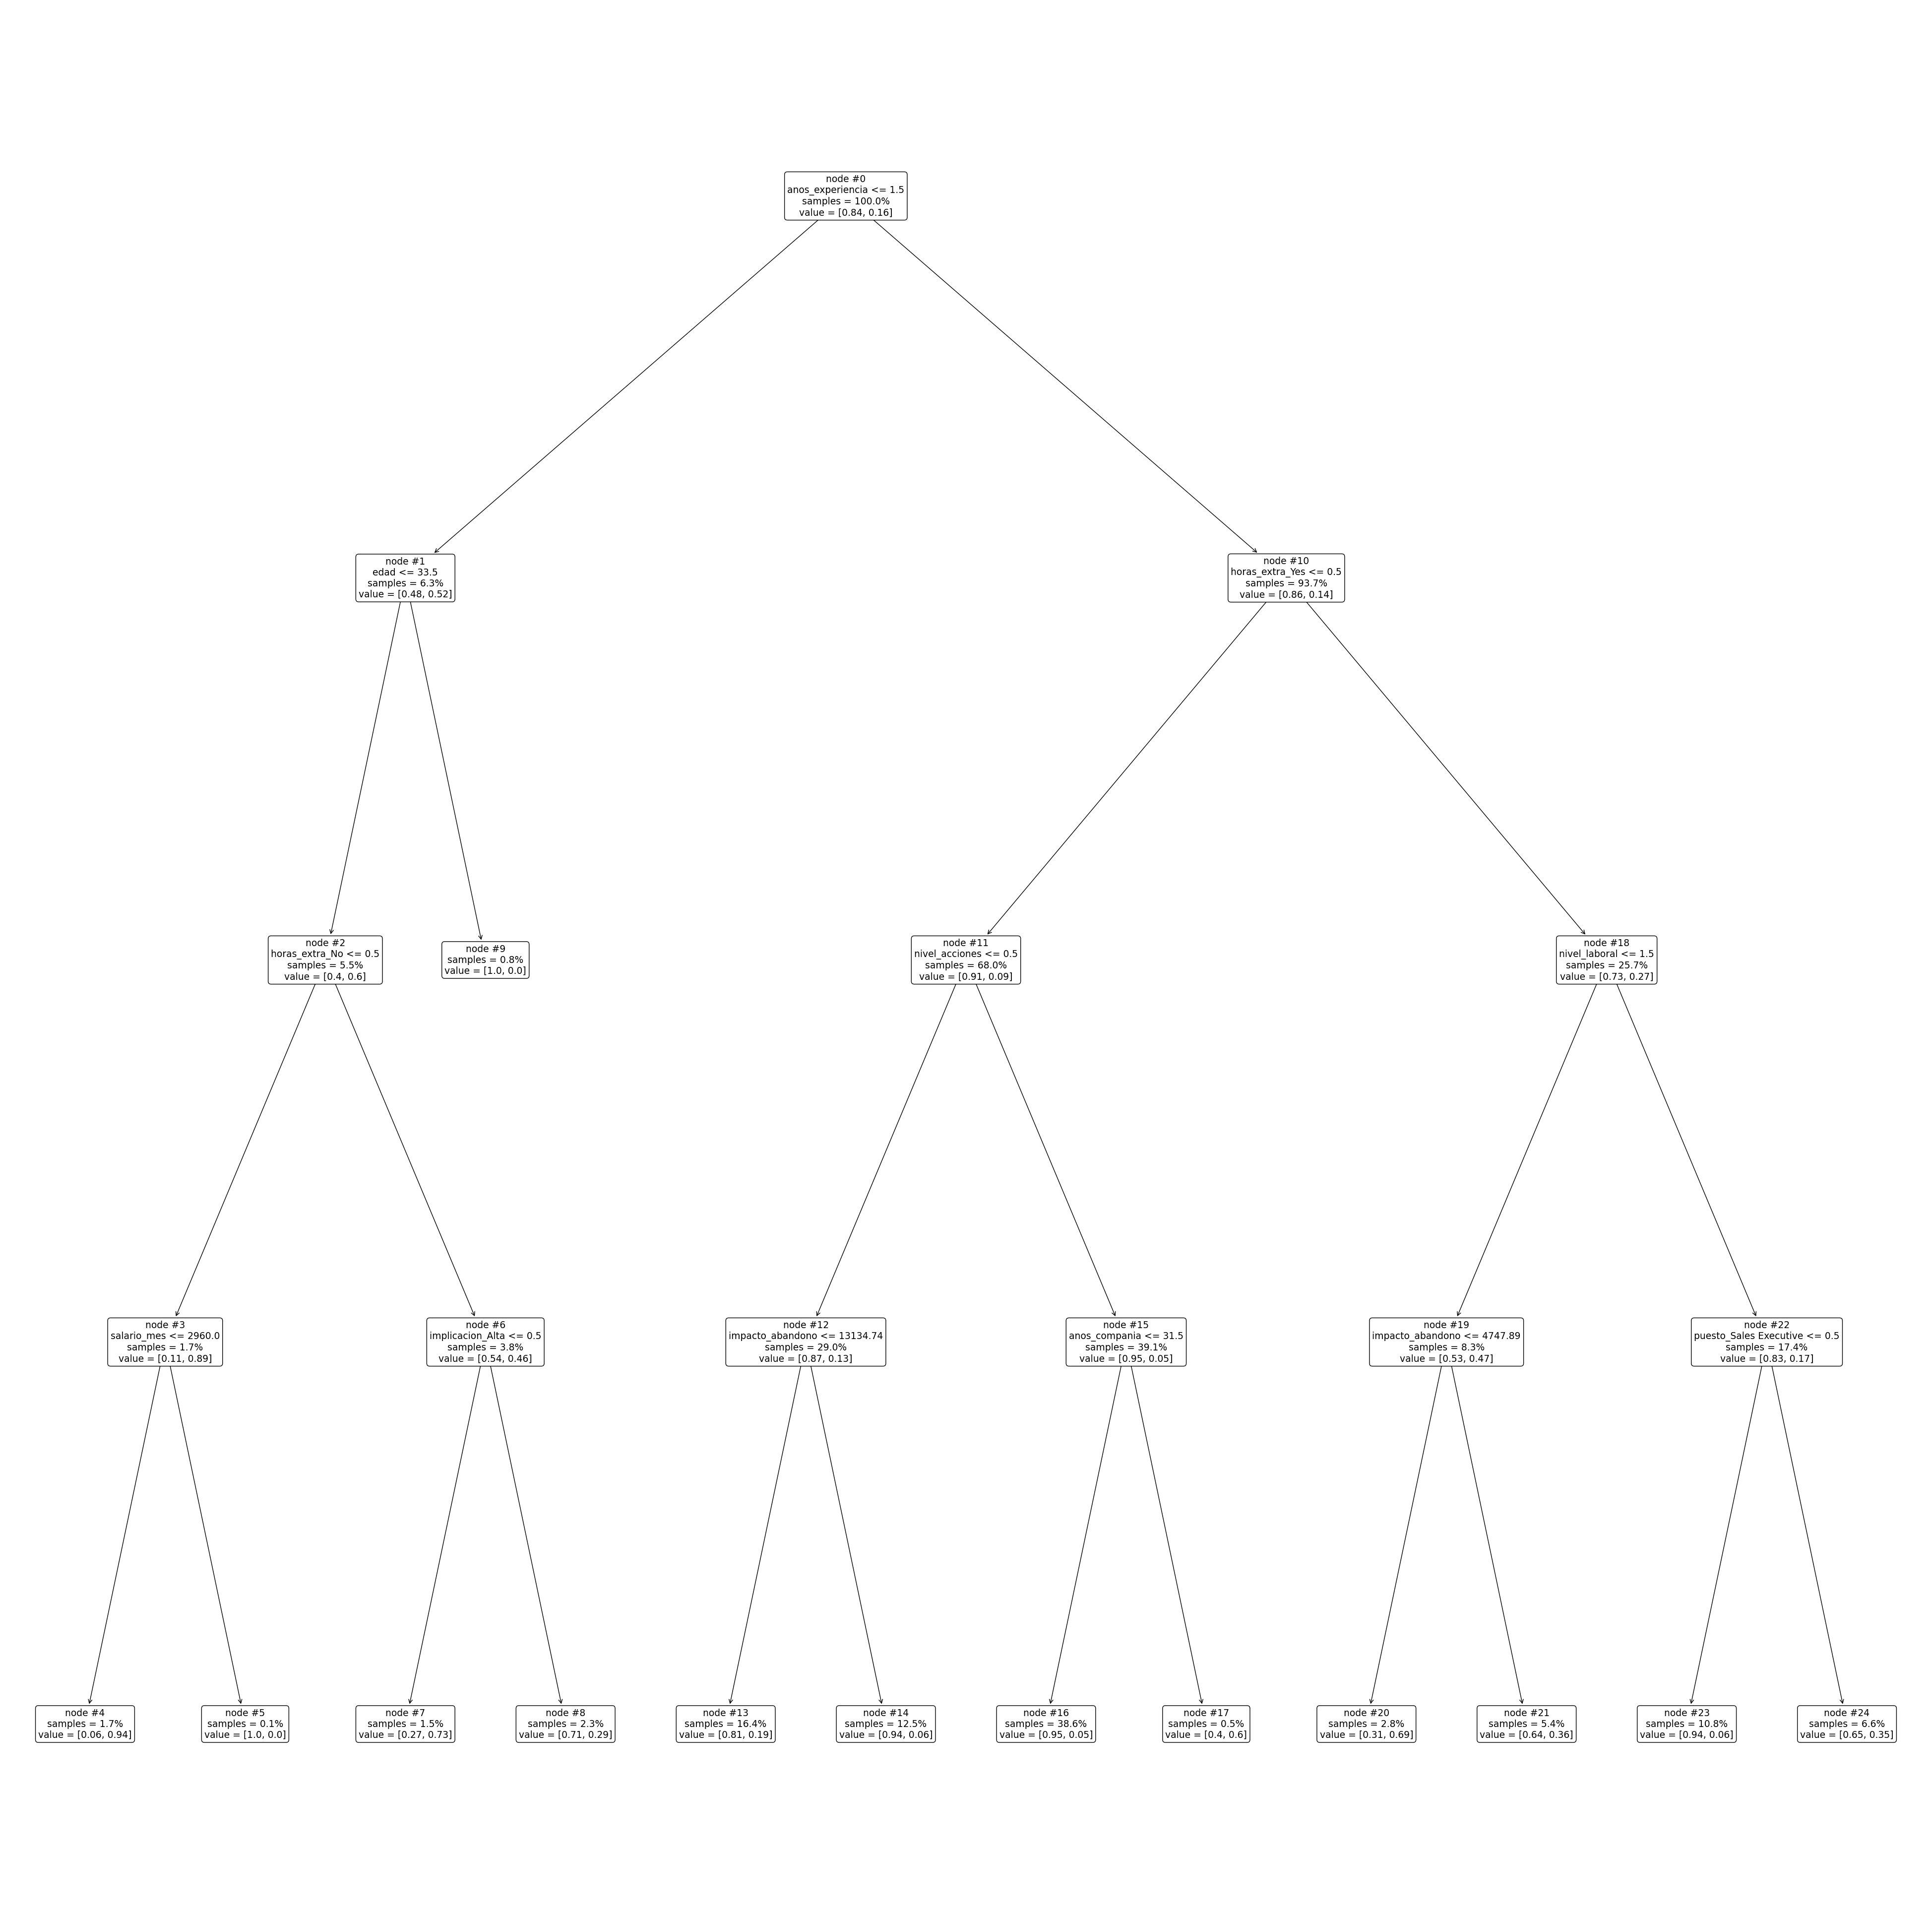

In [71]:
# Diagrama del árbol
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);